# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient 

import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", page_size=100, sort_by="relevancy")

##btc_headlines

In [9]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", page_size=100, sort_by="relevancy")

##eth_headlines

In [10]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


btc_sentiment_df = pd.DataFrame(btc_sentiments)


# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiment_df = btc_sentiment_df[cols]


btc_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836


In [11]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


eth_sentiment_df = pd.DataFrame(eth_sentiments)


# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiment_df = eth_sentiment_df[cols]


eth_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,2021-07-27,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
4,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843


In [12]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.091202,0.058640,0.034520,0.90682
std,0.385426,0.067436,0.058358,0.08566
min,-0.827100,0.000000,0.000000,0.65300
25%,-0.044250,0.000000,0.000000,0.85525
50%,0.000000,0.051000,0.000000,0.91050
75%,0.386825,0.096500,0.067250,1.00000
max,0.883400,0.276000,0.287000,1.00000


In [13]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.138991,0.050630,0.019770,0.929580
std,0.327336,0.058933,0.042827,0.071026
min,-0.812600,0.000000,0.000000,0.714000
25%,0.000000,0.000000,0.000000,0.877500
50%,0.000000,0.000000,0.000000,0.930000
75%,0.406800,0.093250,0.000000,1.000000
max,0.771700,0.194000,0.249000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium - 0.052000

Q: Which coin had the highest compound score?

A: Bitcoin - 0.883400

Q. Which coin had the highest positive score?

A: Bitcoin - 0.276000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
sw_list = stopwords.words('english')

# Expand the default stopwords list if necessary
#Remove the char word.
sw_list.append('char')

sw = set(sw_list)

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
       
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
        
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
btc_tokens = []

for text in btc_sentiment_df['text']:
    article = text
    
    btc_tokens.append(tokenizer(article))
    
btc_sentiment_df['tokens'] = btc_tokens

btc_sentiment_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
5,2021-07-21,"As longtime TechCrunch readers know well, Mich...",0.4939,0.127,0.000,0.873,"[longtime, techcrunch, reader, know, well, mic..."
6,2021-07-28,"SINGAPORE, July 28 (Reuters) - Bitcoin broke a...",0.1280,0.089,0.075,0.836,"[singapore, july, reuters, bitcoin, broke, wed..."
7,2021-06-30,A representation of virtual currency Bitcoin i...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, bitcoin, s..."
8,2021-06-29,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representations, b..."
9,2021-07-21,James Martin/CNET\r\nA UK man was arrested in ...,-0.4767,0.000,0.088,0.912,"[james, martincneta, uk, man, wa, arrested, sp..."


In [18]:
# Create a new tokens column for Ethereum
eth_tokens = []

for text in eth_sentiment_df['text']:
    article = text
    
    eth_tokens.append(tokenizer(article))
    
eth_sentiment_df['tokens'] = eth_tokens

eth_sentiment_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,2021-07-27,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895,"[cryptocurrencies, spiked, monday, amazon, lis..."
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[anthony, di, iorio, cofounder, ethereum, netw..."
5,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[ether, holder, staked, billion, worth, crypto..."
6,2021-07-05,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850,"[ether, cryptocurrency, ethereum, networkphoto..."
7,2021-07-26,This article was translated from our Spanish e...,-0.3400,0.000,0.072,0.928,"[article, wa, translated, spanish, edition, us..."
8,2021-07-02,Major upgrades to the ethereum network could h...,0.4019,0.080,0.000,0.920,"[major, upgrade, ethereum, network, could, hel..."
9,2021-06-29,While the ambitions of crypto investors have s...,0.0000,0.000,0.000,1.000,"[ambition, crypto, investor, swelled, even, fa..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
#Reduce the list of lists (btc_tokens) to a single list.
btc_token_list = [item for sublist in btc_tokens for item in sublist]

# Generate the Bitcoin N-grams where N=2
btc_bigrams = ngrams(btc_token_list, n=2)

In [21]:
#Reduce the list of lists (eth_tokens) to a single list.
eth_token_list = [item for sublist in eth_tokens for item in sublist]

# Generate the Ethereum N-grams where N=2
eth_bigrams = ngrams(eth_token_list, n=2)

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_bigrams, 10)

[(('july', 'reuters'), 18),
 (('virtual', 'currency'), 11),
 (('illustration', 'taken'), 10),
 (('illustration', 'picture'), 10),
 (('taken', 'june'), 8),
 (('currency', 'bitcoin'), 7),
 (('picture', 'taken'), 7),
 (('reuters', 'bitcoin'), 6),
 (('representation', 'virtual'), 6),
 (('bitcoin', 'seen'), 6)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_bigrams, 10)

[(('taken', 'june'), 20),
 (('illustration', 'taken'), 20),
 (('bitcoin', 'ethereum'), 15),
 (('cryptocurrencies', 'bitcoin'), 13),
 (('ethereum', 'dogecoin'), 13),
 (('june', 'reutersdado'), 13),
 (('representations', 'cryptocurrencies'), 12),
 (('dogecoin', 'ripple'), 12),
 (('ripple', 'litecoin'), 12),
 (('pc', 'motherboard'), 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
#download the language model for WordCLoud
#pip install wordcloud

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

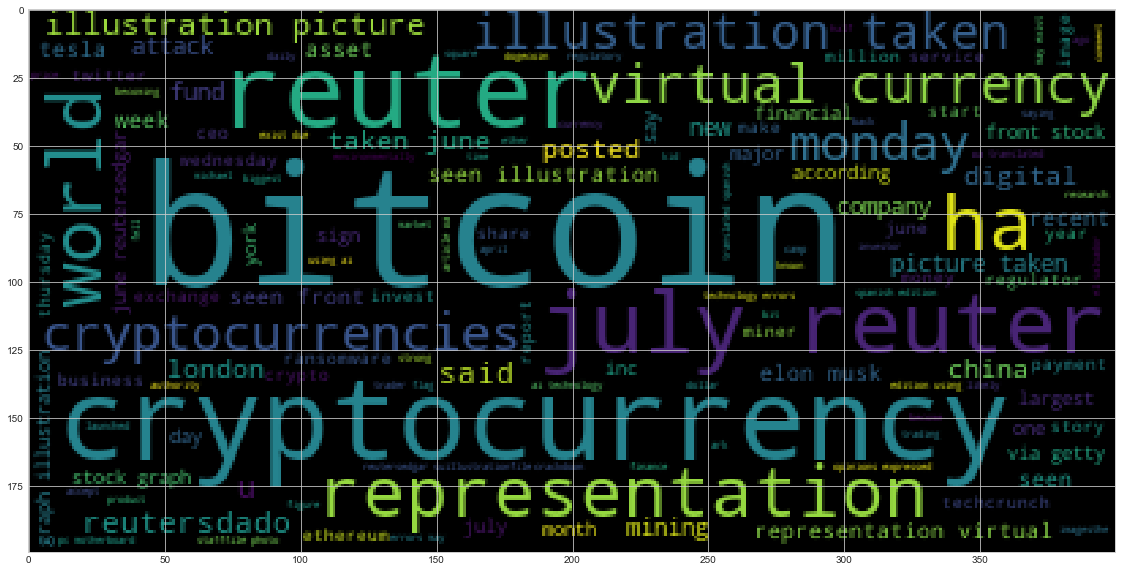

In [28]:
# Generate the Bitcoin word cloud
#Convert the list to string.
btc_big_string = ' '.join(btc_token_list)
wc = WordCloud().generate(btc_big_string)
plt.imshow(wc)

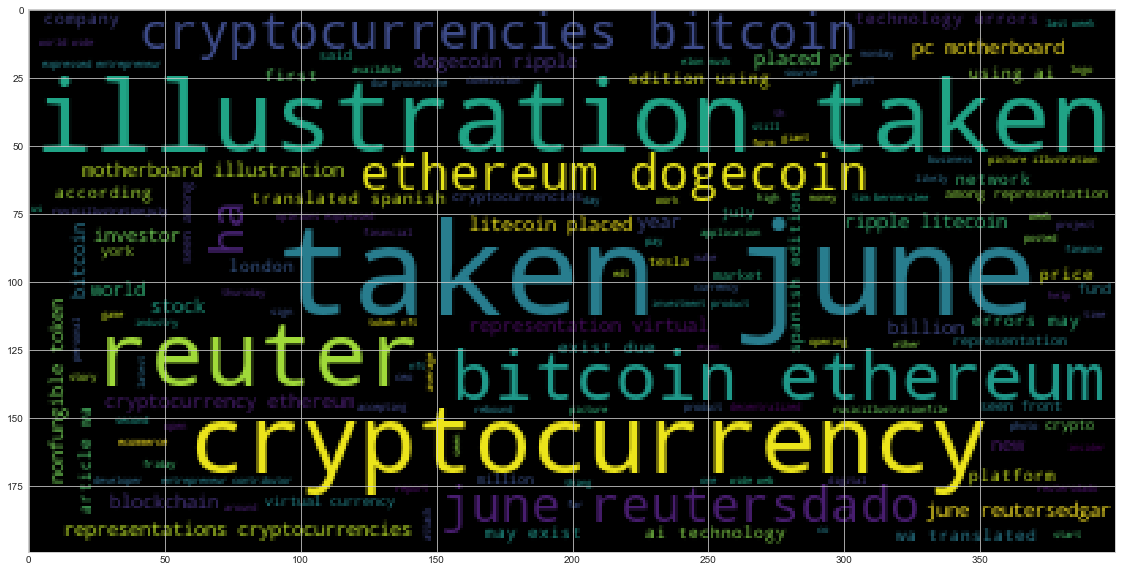

In [29]:
# Generate the Ethereum word cloud
#Convert the list to string.
eth_big_string = ' '.join(eth_token_list)
wc = WordCloud().generate(eth_big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [36]:
import spacy
from spacy import displacy

In [37]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047113 sha256=fc489f5fb19a4f69aa56e43514feae867c89b9a9ab0317750b9cd33fa1e027e6
  Stored in directory: C:\Users\chris\AppData\Local\Temp\pip-ephem-wheel-cache-zsqyrks5\wheels\b7\0d\f0\7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [39]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019126 sha256=eaf31e83f199056dc43a7daa50b34e6640eda096d58da167605e00f01f2ea011
  Stored in directory: c:\users\chris\appdata\local\pip\cache\wheels\64\69\41\6f820cf1d7488a0381a2059f66ec9f8f23116f7c67d18f3d8d
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.3.1
    Uninstalling en-core-web-sm-2.3.1:
      Successfully uninstalled en-core-web-sm-2.3.1


In [42]:
import en_core_web_sm
nlp = en_core_web_sm.load()

C:\Users\chris\anaconda3\envs\pyvizenv\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [47]:
# Load the spaCy model
#nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [43]:
# Concatenate all of the Bitcoin text together
btc_concat = ' '.join(btc_sentiment_df['text'])

In [48]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_concat)

# Add a title to the document
btc_doc.user_data["title"] = "NewsApi Bitcoin NER"

In [49]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [50]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['Dogecoin', 'Reno', 'El Salvador', 'Aldo Baoicchi', 'Canadian', 'Daymak', 'over a thousand', 'Alex Castro', 'Three days', 'the holiday weekend', '$70m', '50.5', 'Bitcoin', 'TechCrunchs', 'every day', '3 p.m. PDT', 'Daily Crunch', 'July 23, 2021', 'Bitcoin and Ethereum', '2021', 'TechCrunch', 'Michael Arrington', 'TechCrunch', 'Crunchbase', 'CrunchFund', 'Tuesday', '2017', 'SINGAPORE', 'July 28', 'Reuters', 'above $40,000', 'Wednesday', 'Bitcoin', 'March 15, 2021', 'REUTERS/Dado Ruvic/IllustrationLONDON,', 'June 30', 'Reuters', 'Reuters', 'Bitcoin', 'June 7, 2021', 'REUTERS/Edgar Su/Illustration/File Photo', 'Reuters', 'James Martin', 'UK', 'Spain', 'Twitter', '2020', 'the US Department of Justi', 'Bitcoin', 'May 19, 2021', 'REUTERS/Dado Ruvic/IllustrationJuly 1 (', 'Reuters', '5.17%', '33', 'November 19, 2020', 'REUTERS/Dado Ruvic/IllustrationSINGAPORE', 'July 21', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/Dado Ruvic/Illustration', 'Bitcoin, Ethereum, DogeCoin', 'Ripple', 'L

---

### Ethereum NER

In [51]:
# Concatenate all of the Ethereum text together
eth_concat = ' '.join(eth_sentiment_df['text'])

In [52]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_concat)

# Add a title to the document
eth_doc.user_data["title"] = "NewsApi Ethereum NER"

In [53]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [54]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['Ethereum Killers', 'Solana', 'Bitcoin', '2021', 'Monday', 'Amazon', 'Bitcoin', 'Ether', 'Friday', 'Anthony Di Iorio', 'Ethereum', 'Bloomberg', 'Slashdot', 'more than $13 billion', '2.0', '+1851', 'Ether', 'Photothek/Getty Images\r\nEther', 'more than $13 billion', '2.0', 'Spanish', 'AI', 'Xoy Capital', 'Guadalajara', 'Jalisco', 'Xoycoin', 'first', '$40 billion', '2025', 'JPMorgan', 'recent months', 'Shopify', 'Monday', 'the NBAs Chicago Bulls la', 'American Express', 'Spanish', 'AI', 'The Securities and Exchange Commission', 'London', '12', '000', 'August 3-5, 2021', 'Clie', '+5964', 'Reuters', 'Bitcoin', 'June 7, 2021', 'REUTERS/Edgar Su/Illustration/File Photo', 'Reuters', 'Hackaday', 'Proof of Work', 'Bitcoin', 'Ethereum', 'Dogecoin', 'Bitcoin', 'May 19, 2021', 'REUTERS/Dado Ruvic/IllustrationJuly 1 (', 'Reuters', '5.17%', '33', 'Polygon', '$100 million', 'Bitcoin, Ethereum, DogeCoin', 'Ripple', 'Litecoin', 'June 29, 2021', 'REUTERS/Dado Ruvic/Illustration/File Photo', 'Tesla', 'F

---